# PREPAREM LES DADES 

Carreguem les llibreries que necessitem

In [45]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  
import networkx as nx
from sklearn import preprocessing #Machine learning

Assignem noms de columnes 
i Llegim les dades de la url a un dataframe de pandas i el mostrem

In [46]:
import requests
import io

In [47]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
s=requests.get(url).content
dataset=pd.read_csv(io.StringIO(s.decode('utf-8')),names=names)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Seleccionem només 10 observacions. Fixem una llavor per poder repetir sempre igual

In [48]:
import random
random.seed(11) #Sempre pasarà al mateix.
dataset=dataset.sample(n = 10) #Mostra de 10 observacions.
print(dataset)

     sepal-length  sepal-width  petal-length  petal-width            Class
10            5.4          3.7           1.5          0.2      Iris-setosa
47            4.6          3.2           1.4          0.2      Iris-setosa
70            5.9          3.2           4.8          1.8  Iris-versicolor
131           7.9          3.8           6.4          2.0   Iris-virginica
2             4.7          3.2           1.3          0.2      Iris-setosa
140           6.7          3.1           5.6          2.4   Iris-virginica
48            5.3          3.7           1.5          0.2      Iris-setosa
63            6.1          2.9           4.7          1.4  Iris-versicolor
129           7.2          3.0           5.8          1.6   Iris-virginica
9             4.9          3.1           1.5          0.1      Iris-setosa


Separem les característiques (columnes x) de les classes (columna y) Per x agafem només 2 columnes  

In [49]:
X = dataset.iloc[:, 0:2].values  #columna 0 i 1.
y = dataset.iloc[:, 4].values  
print(X.shape)
print(y.shape)

(10, 2)
(10,)


In [34]:
print(X)
print(y)

[[5.4 3.9]
 [5.6 2.8]
 [4.6 3.1]
 [6.9 3.1]
 [6.8 3.2]
 [6.5 3. ]
 [5.7 3.8]
 [5.6 2.9]
 [6.6 3. ]
 [5.9 3. ]]
['Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica']


Traiem duplicats

In [50]:
dup=np.unique(X,return_index=True,axis=0)
X=X[dup[1],:]
y=y[dup[1]]
print(X.shape)
print(y.shape)

(10, 2)
(10,)


Seleccionem a l'atzar les files que suposem classificades i retenim la resta que considerem no classificades

In [51]:
#Tatxem alguna clasificacio i calasificar-ho per a veure si ho he fet be
from sklearn.model_selection import train_test_split #es això
import random
random.seed(111)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)#li dono x,y i agafi el 25% pel test i lo altre normal (train).
X_train.shape
num_objectes_train=X_train.shape[0]
num_objectes_test=X_test.shape[0]
print(num_objectes_train)
print(num_objectes_test)

7
3


Dibuixem els nostres exemples amb diferents colors segons la classificació

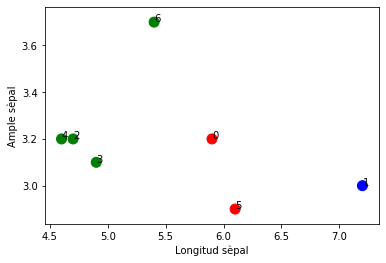

In [52]:
colors = {'Iris-versicolor':'red', 'Iris-virginica':'blue', 'Iris-setosa':'green'}
cols = [colors[i] for i in y_train]
plt.scatter(X_train[:,0],X_train[:,1] , c=cols, s=100)
plt.xlabel("Longitud sèpal")
plt.ylabel("Ample sèpal")
for i, txt in enumerate(range(num_objectes_train)):
    plt.annotate(txt, (X_train[i,0],X_train[i,1]))


# COMENCEM LA CLASSIFICACIÓ D'UN NOU EXEMPLE (EL PRIMER del conjunt de test)

Afegim el punt a classificar

In [53]:
X_clas = np.append(X_train, X_test[0:1,:],axis=0)
#axis --> files
#clas es train pero afegin element que vull clasificar.

Tornem a fer el gràfic amb aquest punt en color groc

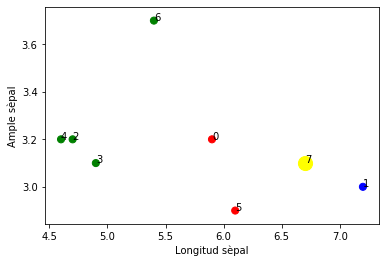

In [54]:
colors = {'Iris-versicolor':'red', 'Iris-virginica':'blue', 'Iris-setosa':'green'}
cols = [colors[i] for i in y_train]
plt.scatter(X_train[:,0],X_train[:,1] , c=cols, s=50)
plt.scatter(X_test[0,0],X_test[0,1], c='yellow',s=200)
plt.xlabel("Longitud sèpal")
plt.ylabel("Ample sèpal")
for i, txt in enumerate(range(num_objectes_train+1)):
    plt.annotate(txt, (X_clas[i,0],X_clas[i,1]))


Estandaritzem les 2 variables del X_clas

In [55]:
X_clas=preprocessing.scale(X_clas)
X_clas[0:5,]
#Si no vols que una variable decideixi mes que les altres,
#les escalem, tenen la mateixa escala.

array([[ 0.23779131,  0.11250879],
       [ 1.69251462, -0.78756153],
       [-1.10503021,  0.11250879],
       [-0.88122662, -0.33752637],
       [-1.216932  ,  0.11250879]])

Fem la matriu de distàncies

In [57]:
#Distancia de tots els elements a tots els elements.
#Fila de zeros on la mida es ... +1 pq tenim nou element a clasificar.
dist=np.zeros(shape=(num_objectes_train+1,num_objectes_train+1), dtype=float)
for i in range(num_objectes_train+1):
    for j in range(num_objectes_train+1):
            dist[i,j]=np.sqrt(np.sum((X_clas[i,:]-X_clas[j,:])**2))
print(dist)

[[0.         1.71065675 1.34282152 1.20612304 1.45472331 1.36852945
  2.3186939  1.00196825]
 [1.71065675 0.         2.93877248 2.61279078 3.04548949 1.31060864
  3.73914192 0.71804034]
 [1.34282152 2.93877248 0.         0.50261286 0.11190179 2.06811485
  2.38261824 2.28283512]
 [1.20612304 2.61279078 0.50261286 0.         0.56145325 1.61656927
  2.7575695  2.01423228]
 [1.45472331 3.04548949 0.11190179 0.56145325 0.         2.15412102
  2.42171424 2.39264261]
 [1.36852945 1.31060864 2.06811485 1.61656927 2.15412102 0.
  3.68450863 1.12290649]
 [2.3186939  3.73914192 2.38261824 2.7575695  2.42171424 3.68450863
  0.         3.06714185]
 [1.00196825 0.71804034 2.28283512 2.01423228 2.39264261 1.12290649
  3.06714185 0.        ]]


Passem la matriu de distàncies a similaritats 1/dist+1 (només per dibuixar el graf)

In [59]:
#Quan vols dibuixar graf necesitas similitud.
#1/disancia+1 pq com algunes distancies son 0, donaria infinit.
sim=1/(dist+1)
#la millor manera es 1/distancia per a definir la simulitud

Grafiquem el graf (complet) amb la matriu d'adjacècncia com les similaritats

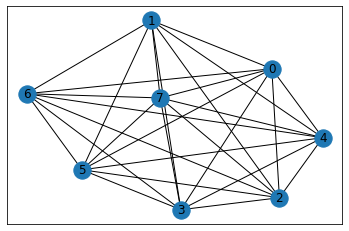

In [60]:
G1=nx.from_numpy_matrix(sim)
nx.draw_networkx(G1)

Fixem el número de veins

In [61]:
K=3

Determinem els índex dels k més propers

In [69]:
#arc osrt --> ordenam per columnes (axis=1)
#agafem matriu distancies ordena posant primer columna i fesmo per totes les files.
#no agafis la primera (ja q distancia 0, mateix objecte.)
dist_sort=dist.argsort(axis=1)[:,1:(K+1)]
#dist_sort[5:8,]
dist_sort

array([[7, 3, 2],
       [7, 5, 0],
       [4, 3, 0],
       [2, 4, 0],
       [2, 3, 0],
       [7, 1, 0],
       [0, 2, 4],
       [1, 0, 5]], dtype=int64)

In [66]:
dist.argsort(axis=1)
#ordena distancies i dona els index
#com escullo i afago nomes els tres primers(sense contar el primer, es ell mateix).
#[:,1:(K+1)] pq k=3, 1:4 pq el ultim no tel agafa

array([[0, 7, 3, 2, 5, 4, 1, 6],
       [1, 7, 5, 0, 3, 2, 4, 6],
       [2, 4, 3, 0, 5, 7, 6, 1],
       [3, 2, 4, 0, 5, 7, 1, 6],
       [4, 2, 3, 0, 5, 7, 6, 1],
       [5, 7, 1, 0, 3, 2, 4, 6],
       [6, 0, 2, 4, 3, 7, 5, 1],
       [7, 1, 0, 5, 3, 2, 4, 6]], dtype=int64)

A l'array anterior veiem que la observació 7 te com a 3 més propers el 0,2,3. Comprovem-ho amb les distàncies

In [70]:
dist[7,]

array([1.00196825, 0.71804034, 2.28283512, 2.01423228, 2.39264261,
       1.12290649, 3.06714185, 0.        ])

In [71]:
print(dist[7,[0,2,3]])

[1.00196825 2.28283512 2.01423228]


Creem la matriu d'adjacències amb mutual (pot ser que no tots 4 seran al 0 pel mutual)

In [72]:
adj=np.zeros(shape=(num_objectes_train+1,num_objectes_train+1), dtype=float)
for i in range(num_objectes_train+1):
   for j in range(K):
       if i in dist_sort[dist_sort[i,j],:]:
           adj[i,dist_sort[i,j]]=1

In [74]:
#Comprovacions
print(dist_sort[7,])

[1 0 5]


Veiem que totes (0,2 i3 tenen el 7 com a un dels tres més propers i per tant al mutual graf hi seran tots tres.
Veiem que el 7 te com a 3-veins més propers el 0,5,3.

In [75]:
print(dist_sort[0,])
print(dist_sort[2,])
print(dist_sort[3,])

[7 3 2]
[4 3 0]
[2 4 0]


In [77]:
print(adj)

[[0. 0. 1. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 1.]
 [1. 0. 0. 1. 1. 0. 0. 0.]
 [1. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 1. 0. 0.]]


Dibuixem el graf amb les adjacències

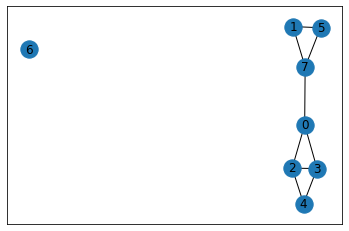

In [76]:
#Ara li donem adj no similitud.
G2=nx.from_numpy_matrix(adj)
nx.draw_networkx(G2)

# Assignar la classe al nou exemple

Agafem de l'última fila (l'exemple que volem classificar) totes les columnes menys la última i ho convertim en bool (perquè seran indexos per mirar les classes dels exemples coneguts)

In [78]:
index_clas=adj[-1,:-1].astype(bool)
print(index_clas)

[ True  True False False False  True False]


Mirem quines són les classes dels que estan relacionats amb la nova observació i pensem com ho classificarà (segons la classe més freqüent)

In [79]:
y_train[index_clas]

array(['Iris-versicolor', 'Iris-virginica', 'Iris-versicolor'],
      dtype=object)

Classifiquem l'observació

In [82]:
if True in index_clas:
    u, c = np.unique(y_train[index_clas], return_counts=True)
    y_class=u[c.argmax()]
else:
    y_class='Unclassified'
print(y_class)

Iris-versicolor


Mirem si ho ha fet bé

In [83]:
y_class==y_test[0]

False